# Modelagem de tópicos
### corpus: Artigos e Resumos

## Bibliotecas utilizadas

In [1]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords

import nltk
from nltk.probability import FreqDist

import csv
import numpy as np
import matplotlib.pyplot as plt

D:\anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#TRANSFORMAR SIGLAS POPULARES EM PALAVRAS

def conversao_termos(texto):
    texto = re.sub(" abc "," academia brasileira de ciência ",texto.lower())
    texto = re.sub(" ai "," arquitetura da informação ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" american society for information science and Technology "," asist ",texto.lower())
    texto = re.sub(" annual review of information science and technology "," arist ",texto.lower())
    texto = re.sub(" aoi "," arquitetura e organização da informação ",texto.lower())
    texto = re.sub(" associação brasileira de educação em ciência da informação "," abecin ",texto.lower())
    texto = re.sub(" associação brasileira de ensino de biblioteconomia e documentação "," abebd ",texto.lower())
    texto = re.sub(" associação brasileira de normas técnicas "," abnt ",texto.lower())
    texto = re.sub(" associação nacional de pesquisa e pós-graduação em ciência da informação "," ancib ",texto.lower())
    texto = re.sub(" base de dados referencial de artigos de periódicos em ciência da informação "," brapci ",texto.lower())
    texto = re.sub(" bci "," biblioteconomia e ciência da informação ",texto.lower())
    texto = re.sub(" biblioteca digital de teses e dissertações "," bdtd ",texto.lower())
    texto = re.sub(" bn "," biblioteca nacional ",texto.lower())
    texto = re.sub(" bu "," biblioteca universitária ",texto.lower())
    texto = re.sub(" c&t "," ciência e tecnologia ",texto.lower())
    texto = re.sub(" cc "," ciência da computação ",texto.lower())
    texto = re.sub(" ccn "," catálogo coletivo nacional ",texto.lower())
    texto = re.sub(" cdd "," classificação decimal de dewey ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" ci "," ciência da informação ",texto.lower())
    texto = re.sub(" ci:"," ciência da informação ",texto.lower()) 
    texto = re.sub(" ci,"," ciência da informação ",texto.lower())
    texto = re.sub(" cms "," content management system ",texto.lower())
    texto = re.sub(" cne "," conselho nacional de educação ",texto.lower())
    texto = re.sub(" conselho nacional de desenvolvimento científico e tecnológico "," cnpq ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" crm "," customer relationship management ",texto.lower())
    texto = re.sub(" dc "," dublin core ",texto.lower())
    texto = re.sub(" descriptive ontology for linguistic and cognitive engineering "," dolce ",texto.lower())
    texto = re.sub(" ead "," educação à distância ",texto.lower())
    texto = re.sub(" eci "," escola de ciência da informação ",texto.lower())
    texto = re.sub(" enade "," exame nacional de desempenho ",texto.lower())
    texto = re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",texto.lower())
    texto = re.sub(" fgv "," Fundação Getúlio Vargas ",texto.lower())
    texto = re.sub(" fiocruz "," fundação oswaldo cruz ",texto.lower())
    texto = re.sub(" ftp "," file transfer protocol ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de minas gerais "," fapemig ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de são paulo "," fapesp ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo do rio de janeiro "," faperj ",texto.lower())
    texto = re.sub(" fundação de amparo às pesquisas "," faps ",texto.lower())
    texto = re.sub(" gic "," gestão da informação e conhecimento ",str(texto.lower()))
    texto = re.sub(" gic "," gestão da informação e do conhecimento ",texto.lower())
    texto = re.sub(" gpl "," general public licence ",texto.lower())
    texto = re.sub(" hypertext markup language limguagem "," html ",texto.lower())
    texto = re.sub(" ia "," inteligência artificial ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ics "," informação cultura e sociedade ",texto.lower())
    texto = re.sub(" ict "," informação, ciência e tecnologia ",texto.lower())
    texto = re.sub(" idh "," índice de desenvolvimento humano ",texto.lower())
    texto = re.sub(" ies "," instituição de ensino superior ",texto.lower())
    texto = re.sub(" information science and technology abstracts "," ista ",texto.lower())
    texto = re.sub(" instituto brasileiro de bibliografia e documentação "," ibbd ",texto.lower())
    texto = re.sub(" instituto brasileiro de geografia e estatística "," ibge ",texto.lower())
    texto = re.sub(" instituto brasileiro de informação em ciência e tecnologia "," ibict ",texto.lower())
    texto = re.sub(" instituto de ciência da informação "," ici ",texto.lower())
    texto = re.sub(" instituto nacional de estudos e pesquisas educacionais anísio teixeira "," inep ",texto.lower())
    texto = re.sub(" instituto universitário de pesquisa do rio de janeiro "," iuoerj ",texto.lower())
    texto = re.sub(" international federation of library associations and institutions "," ifla ",texto.lower())
    texto = re.sub(" international standard book number "," isbn ",texto.lower())
    texto = re.sub(" international standard serial number "," issn ",texto.lower())
    texto = re.sub(" isi "," institute for scientific information ",texto.lower())
    texto = re.sub(" iso "," international organization for standardization ",texto.lower())
    texto = re.sub(" it "," informação e tecnologia ",texto.lower())
    texto = re.sub(" jcr "," journal citation reports ",texto.lower())
    texto = re.sub(" jstor "," journal storage ",texto.lower())
    texto = re.sub(" kos "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" lc "," linguagem cinzenta ",texto.lower())
    texto = re.sub(" ld "," linguagem documentária ",texto.lower())
    texto = re.sub(" ldb "," lei de diretrizes e bases ",texto.lower())
    texto = re.sub(" library and informations science abstracts "," lisa ",texto.lower())
    texto = re.sub(" ln "," linguagem natural ",texto.lower())
    texto = re.sub(" lod "," linked open data ",texto.lower())
    texto = re.sub(" marc "," machine readable cataloging ",texto.lower())
    texto = re.sub(" mdi "," multiple document interface ",texto.lower())
    texto = re.sub(" mec "," ministério da educação ",texto.lower())
    texto = re.sub(" npd "," núcleo de pesquisa e documentação ",texto.lower())
    texto = re.sub(" oai "," open archives iniciative ",texto.lower())
    texto = re.sub(" oc "," organização do conhecimento ",texto.lower())
    texto = re.sub(" ocr "," optical character recognition ",texto.lower())
    texto = re.sub(" oi "," organização da informação ",texto.lower())
    texto = re.sub(" ojs "," open journal systems ",texto.lower())
    texto = re.sub(" ong "," organização não-governamental ",texto.lower())
    texto = re.sub(" onu "," organização das nações unidas ",texto.lower())
    texto = re.sub(" organização das nações unidas para a educação e cultura "," unesco ",texto.lower())
    texto = re.sub(" osi "," open society institute ",texto.lower())
    texto = re.sub(" oui "," organização e uso da informação ",texto.lower())
    texto = re.sub(" owl "," web ontology language ",texto.lower())
    texto = re.sub(" pln "," processamento de linguagem natural ",texto.lower())
    texto = re.sub(" plos "," public library of science ",texto.lower())
    texto = re.sub(" poi "," produção e organização da informação ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de minas gerais "," puc mg ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de são paulo "," puc sp ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio de janeiro "," puc rj ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio grande do sul "," puc rs ",texto.lower())
    texto = re.sub(" ppg "," programa de pós-graduação ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciência da informação "," ppgci ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciências sociais "," ppgcs ",texto.lower())
    texto = re.sub(" programa de pós-graduação em sociologia "," ppgs ",texto.lower())
    texto = re.sub(" rc "," representação do conhecimento ",texto.lower())
    texto = re.sub(" rdf "," resource description framework ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" sad "," sistema de apoio à decisão ",texto.lower())
    texto = re.sub(" sci "," science citation index ",texto.lower())
    texto = re.sub(" scientific electronic library online "," scielo",texto.lower())
    texto = re.sub(" sdr "," zona de desenvolvimento real ",texto.lower())
    texto = re.sub(" serviço central de informação bibliográfica "," scib ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem comercial "," senac ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem industrial "," senai ",texto.lower())
    texto = re.sub(" serviço social da indústria "," sesi ",texto.lower())
    texto = re.sub(" serviço social do comércio "," sesc ",texto.lower())
    texto = re.sub(" sesi "," serviço social da indústria ",texto.lower())
    texto = re.sub(" sibi "," sistema integrado de bibliotecas ",texto.lower())
    texto = re.sub(" sig "," sistema de informação gerencial ",texto.lower())
    texto = re.sub(" snad "," secretária nacional de políticas anti-drogas ",texto.lower())
    texto = re.sub(" snpq "," sistema nacional de pós-graduação",texto.lower())
    texto = re.sub(" soc "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" sri "," sistema de recuperação da informação ",texto.lower())
    texto = re.sub(" ssd "," sistema de suporte à decisão ",texto.lower())
    texto = re.sub(" tcc "," trabalho de conclusão de curso ",texto.lower())
    texto = re.sub(" universidade federal de minas gerais "," ufmg ",texto.lower())
    texto = re.sub(" universidade federal de ouro preto "," ufop ",texto.lower())
    texto = re.sub(" universidade federal de pernambuco "," ufpe ",texto.lower())
    texto = re.sub(" universidade federal de santa caratina "," ufsc ",texto.lower())
    texto = re.sub(" universidade federal de são carlos "," ufscar ",texto.lower())
    texto = re.sub(" universidade federal de sergipe "," ufs ",texto.lower())
    texto = re.sub(" universidade federal de viçosa "," ufv ",texto.lower())
    texto = re.sub(" universidade federal do ceará "," ufc ",texto.lower())
    texto = re.sub(" universidade federal do estado do rio de janeiro "," unirio ",texto.lower())
    texto = re.sub(" universidade federal do maranhão "," ufma ",texto.lower())
    texto = re.sub(" universidade federal do pará "," ufpa ",texto.lower())
    texto = re.sub(" universidade federal do paraná "," ufpr ",texto.lower())
    texto = re.sub(" universidade federal do rio de janeiro "," ufrj ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do norte "," ufrn ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do sul  "," ufrgs ",texto.lower())
    texto = re.sub(" universidade federal fluminense "," uff ",texto.lower())
    texto = re.sub(" universidade federal rural do rio de janeiro "," ufrrj ",texto.lower())
    texto = re.sub(" uri "," uniform resource identifier ",texto.lower())
    texto = re.sub(" world wide web consortium "," w3c ",texto.lower())
    texto = re.sub(" xml "," extensible markup language ",texto.lower())
    texto = re.sub(" zpd "," zona de desenvolvimento proximal ",texto.lower())
    texto = re.sub("-se", "", texto.lower())
    texto = re.sub(" se ", "", texto.lower())
    texto = re.sub("-lo ", "", texto.lower())
    texto = re.sub("-la ", "", texto.lower())
    texto = re.sub(" lo ", "", texto.lower())
    texto = re.sub(" la ", "", texto.lower())
    return texto

In [3]:
#CONFIGURANDO STOP_WORDS PARA PORTUGUÊS

stop_words = set(stopwords.words('portuguese'))
stop_words_us =  set(stopwords.words('english'))

#ADICIONAR INSERÇÕES DE PALAVRAS DE PARADA
new_stopwords = ['enancib','é','onde','senão','quanto','outros','sobre','sobretudo','ser','ainda','quais','desse','assim','tal','através','podemos','portanto','pode','tanto','alguns','possível','p.','v','p','-se','se',' se','nesse','nessa','neste','nesta','http','disponível','acesso','sendo','marília','rio','dessa','diz','respeito','finais','considerações','desta','belo horizointe','janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro','porto alegre','outro','xix','londrina','paulista','xvii','sentido','maior','bem','ter','deve','devem','entretanto','fazer','todo','tipo','exemplo','pois','apenas','utilizado','utilizados','acordo','casa','figura','cada','tese','acesso','partir','parte','segundo','autor','outras','podem','vez','todos','então','sim','todas','apresenta','algumas','outra','lo','la','-lo','-la','porque','por que','os','etc','jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']


stop_words.update(new_stopwords)
stop_words.update(stop_words_us)
new_stopwords_list = set(stop_words)

In [4]:
#SETAR DOCUMENTO A SER LIDO

#CAMINHO DO ARQUIVO
data = []
pasta = "corpus\corpus_artigosresumos2012-2017"
caminho="" + pasta

arquivo = open(caminho + ".txt", "r",encoding="utf-8")

In [5]:
#LEITURA DO CORPUS

x=0
for fileid in arquivo:
    document = fileid
    document = conversao_termos(document)

#    document=re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",str(document.lower()))
    data.append(document)

NO_DOCUMENTS = len(data)
print(NO_DOCUMENTS)

2006


In [18]:
#RESULTADO PARA VERIFICAÇÃO DE CONVERSÃO DE SIGLAS E LEITURA DE TEXTO CONTIDO NO CORPUS

print(data[1])

["  1xiii enancib - xiii enancib 2012 gt 1 – estudos históricos e epistemológicos da ciência da informação da possibilidade de uma teoria pura da ciência da informação comunicação oral andityas soares de moura costa matos – ufmg max cirino de mattos – ufmg max@cognotec.com.br      \x0c  2da possibilidade de uma teoria pura da ciência da informação resumo: o artigo discute a fragilidade epistemológica da ciência da informação a partir da adoção de um termo polissêmico como objeto científico, e a similaridade dessa situação com o contexto da criação da teoria pura do direito de hans kelsen. após a apresentação de algumas definições sobre o objeto da ciência da informação, discutem alguns reflexos relacionados à identidade científica e à fundamentação teórica derivadas de um objeto polissêmico. apresenta uma breve introdução à teoria pura do direito e algumas reflexões sobre a possibilidade de uma teoria pura da ciência da informação. palavras-chave: ciência da informação. ciência do dire

In [8]:
#FUNÇÃO BIGRAMA E TRIGRAMA

def bigramas(words):
 
    bigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-1):
            break
        else:
            bigrama_obs = words[i] + '_' + words[i+1]
            bigrams.append(bigrama_obs)
 
    return bigrams

def trigramas(words):
 
    trigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-2):
            break
        else:
            trigrama_obs = words[i] + '_' + words[i+1] + '_' + words[i+2]
            trigrams.append(trigrama_obs)
 
    return trigrams

In [9]:
# TOKENIZAR O DOCUMENTO E FAZER A STOPWORDS

def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in stop_words and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
tokenized_data = []
texto2 = []
total_unigramas = []
total_bigramas = []
total_trigramas = []

for text in data:
    xtexto = clean_text(text)

#CRIAR O UNIGRAMA, BIGRAMAS, TRIGRAMAS
    unigramas = xtexto
    xbigramas = bigramas(xtexto)
    xtrigramas = trigramas(xtexto)
    xunigramas = unigramas + xbigramas + xtrigramas
    
    tokenized_data.append(xunigramas)
    texto2 = texto2 + xunigramas

#CRIAR OPÇÃO PARA MOSTRAR A FREQUENCIA SOMENTE DE UNIGRAMA , BIGRAMAS E TRIGRAMAS
    total_unigramas = total_unigramas + unigramas
    total_bigramas = total_bigramas + xbigramas
    total_trigramas = total_trigramas + xtrigramas
    
xfrequencia = texto2

In [21]:
#TOTAL DE UNIGRAMAS, BIGRAMAS E TRIGRAMAS
print("Total de Unigramas: "+ str((len(total_unigramas))))
print("Total de Bigramas: "+ str((len(total_bigramas))))
print("Total de Trigramas: "+ str((len(total_trigramas))))

Total de Unigramas: 5626467
Total de Bigramas: 5624461
Total de Trigramas: 5622455


In [22]:
#CELULA EXTRA - VERIFICAR TEXTO TOKENIZADO com n-gramas
print(tokenized_data[1])

['xiii', 'estudos', 'históricos', 'epistemológicos', 'informação', 'possibilidade', 'teoria', 'pura', 'informação', 'comunicação', 'oral', 'andityas', 'soares', 'moura', 'costa', 'matos', 'ufmg', 'max', 'cirino', 'mattos', 'ufmg', 'max', 'cognotec.com.br', 'possibilidade', 'teoria', 'pura', 'informação', 'resumo', 'artigo', 'discute', 'fragilidade', 'epistemológica', 'informação', 'adoção', 'termo', 'polissêmico', 'objeto', 'científico', 'similaridade', 'situação', 'contexto', 'criação', 'teoria', 'pura', 'direito', 'hans', 'kelsen', 'apresentação', 'definições', 'objeto', 'informação', 'discutem', 'reflexos', 'relacionados', 'identidade', 'científica', 'fundamentação', 'derivadas', 'objeto', 'polissêmico', 'breve', 'introdução', 'teoria', 'pura', 'direito', 'reflexões', 'possibilidade', 'teoria', 'pura', 'informação', 'palavras-chave', 'informação', 'direito', 'epistemologia', 'objeto', 'científico', 'teoria', 'pura', 'direito', 'possibility', 'pure', 'theory', 'information', 'science

# CRIANDO A FREQUÊNCIA

In [10]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA GERAL
num_freq = 1000
fdist = FreqDist(xfrequencia)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_artigosresumos_geral"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 96309, 'pesquisa': 31357, 'conhecimento': 28070, 'dados': 23793, 'informações': 18351, 'forma': 17390, 'processo': 16188, 'social': 15822, 'information': 14689, 'uso': 14532, 'comunicação': 14252, 'documentos': 14019, 'produção': 13867, 'organização': 13636, 'trabalho': 12606, 'gestão': 12301, 'relação': 11907, 'estudo': 11666, 'meio': 11565, 'memória': 11527, 'brasil': 11499, 'sociais': 11175, 'estudos': 10927, 'desenvolvimento': 10762, 'científica': 10703, 'contexto': 10305, 'sociedade': 9971, 'sistema': 9819, 'usuários': 9660, 'paulo': 9607, 'busca': 9575, 'tecnologia': 9435, 'autores': 9242, 'web': 9203, 'biblioteca': 9174, 'bibliotecas': 9085, 'campo': 8808, 'digital': 8778, 'universidade': 8637, 'resultados': 8430, 'cultura': 8398, 'sistemas': 8269, 'diferentes': 8202, 'construção': 8097, 'relações': 8069, 'base': 7944, 'representação': 7911, 'nacional': 7895, 'processos': 7835, 'modelo': 7805, 'informacional': 7441, 'conceito': 7411, 'instituições': 7391,


  PALAVRA -- FREQUÊNCIA


[('informação', 96309),
 ('pesquisa', 31357),
 ('conhecimento', 28070),
 ('dados', 23793),
 ('informações', 18351),
 ('forma', 17390),
 ('processo', 16188),
 ('social', 15822),
 ('information', 14689),
 ('uso', 14532),
 ('comunicação', 14252),
 ('documentos', 14019),
 ('produção', 13867),
 ('organização', 13636),
 ('trabalho', 12606),
 ('gestão', 12301),
 ('relação', 11907),
 ('estudo', 11666),
 ('meio', 11565),
 ('memória', 11527),
 ('brasil', 11499),
 ('sociais', 11175),
 ('estudos', 10927),
 ('desenvolvimento', 10762),
 ('científica', 10703),
 ('contexto', 10305),
 ('sociedade', 9971),
 ('sistema', 9819),
 ('usuários', 9660),
 ('paulo', 9607),
 ('busca', 9575),
 ('tecnologia', 9435),
 ('autores', 9242),
 ('web', 9203),
 ('biblioteca', 9174),
 ('bibliotecas', 9085),
 ('campo', 8808),
 ('digital', 8778),
 ('universidade', 8637),
 ('resultados', 8430),
 ('cultura', 8398),
 ('sistemas', 8269),
 ('diferentes', 8202),
 ('construção', 8097),
 ('relações', 8069),
 ('base', 7944),
 ('represe

In [18]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA UNIGRAMA
num_freq = 1000
fdist = FreqDist(total_unigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_artigosresumos_unigrama"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 96309, 'pesquisa': 31357, 'conhecimento': 28070, 'dados': 23793, 'informações': 18351, 'forma': 17390, 'processo': 16188, 'social': 15822, 'information': 14689, 'uso': 14532, 'comunicação': 14252, 'documentos': 14019, 'produção': 13867, 'organização': 13636, 'trabalho': 12606, 'gestão': 12301, 'relação': 11907, 'estudo': 11666, 'meio': 11565, 'memória': 11527, 'brasil': 11499, 'sociais': 11175, 'estudos': 10927, 'desenvolvimento': 10762, 'científica': 10703, 'contexto': 10305, 'sociedade': 9971, 'sistema': 9819, 'usuários': 9660, 'paulo': 9607, 'busca': 9575, 'tecnologia': 9435, 'autores': 9242, 'web': 9203, 'biblioteca': 9174, 'bibliotecas': 9085, 'campo': 8808, 'digital': 8778, 'universidade': 8637, 'resultados': 8430, 'cultura': 8398, 'sistemas': 8269, 'diferentes': 8202, 'construção': 8097, 'relações': 8069, 'base': 7944, 'representação': 7911, 'nacional': 7895, 'processos': 7835, 'modelo': 7805, 'informacional': 7441, 'conceito': 7411, 'instituições': 7391,

[('informação', 96309),
 ('pesquisa', 31357),
 ('conhecimento', 28070),
 ('dados', 23793),
 ('informações', 18351),
 ('forma', 17390),
 ('processo', 16188),
 ('social', 15822),
 ('information', 14689),
 ('uso', 14532),
 ('comunicação', 14252),
 ('documentos', 14019),
 ('produção', 13867),
 ('organização', 13636),
 ('trabalho', 12606),
 ('gestão', 12301),
 ('relação', 11907),
 ('estudo', 11666),
 ('meio', 11565),
 ('memória', 11527),
 ('brasil', 11499),
 ('sociais', 11175),
 ('estudos', 10927),
 ('desenvolvimento', 10762),
 ('científica', 10703),
 ('contexto', 10305),
 ('sociedade', 9971),
 ('sistema', 9819),
 ('usuários', 9660),
 ('paulo', 9607),
 ('busca', 9575),
 ('tecnologia', 9435),
 ('autores', 9242),
 ('web', 9203),
 ('biblioteca', 9174),
 ('bibliotecas', 9085),
 ('campo', 8808),
 ('digital', 8778),
 ('universidade', 8637),
 ('resultados', 8430),
 ('cultura', 8398),
 ('sistemas', 8269),
 ('diferentes', 8202),
 ('construção', 8097),
 ('relações', 8069),
 ('base', 7944),
 ('represe

In [19]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA BIGRAMA
num_freq = 1000
fdist = FreqDist(total_bigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_artigosresumos_bigrama"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação_tecnologia': 3959, 'recuperação_informação': 3456, 'information_science': 3435, 'universidade_federal': 3413, 'produção_científica': 2991, 'informação_conhecimento': 2650, 'gestão_informação': 2490, 'redes_sociais': 2407, 'organização_conhecimento': 2303, 'belo_horizonte': 2182, 'informação_comunicação': 2119, 'uso_informação': 1821, 'gestão_conhecimento': 1717, 'fontes_informação': 1604, 'bases_dados': 1595, 'dados_pesquisa': 1581, 'ponto_vista': 1549, 'arquitetura_informação': 1490, 'tecnologias_informação': 1485, 'dissertação_mestrado': 1469, 'informação_informação': 1468, 'coleta_dados': 1466, 'comunicação_científica': 1464, 'base_dados': 1435, 'sistemas_informação': 1427, 'pesquisa_informação': 1316, 'organização_informação': 1304, 'competência_informação': 1267, 'bibliotecas_universitárias': 1264, 'informação_brasília': 1220, 'tomada_decisão': 1215, 'patrimônio_cultural': 1215, 'comunicação_oral': 1209, 'gestão_documentos': 1168, 'web_semântica': 1168, 'port


  PALAVRA -- FREQUÊNCIA


[('informação_tecnologia', 3959),
 ('recuperação_informação', 3456),
 ('information_science', 3435),
 ('universidade_federal', 3413),
 ('produção_científica', 2991),
 ('informação_conhecimento', 2650),
 ('gestão_informação', 2490),
 ('redes_sociais', 2407),
 ('organização_conhecimento', 2303),
 ('belo_horizonte', 2182),
 ('informação_comunicação', 2119),
 ('uso_informação', 1821),
 ('gestão_conhecimento', 1717),
 ('fontes_informação', 1604),
 ('bases_dados', 1595),
 ('dados_pesquisa', 1581),
 ('ponto_vista', 1549),
 ('arquitetura_informação', 1490),
 ('tecnologias_informação', 1485),
 ('dissertação_mestrado', 1469),
 ('informação_informação', 1468),
 ('coleta_dados', 1466),
 ('comunicação_científica', 1464),
 ('base_dados', 1435),
 ('sistemas_informação', 1427),
 ('pesquisa_informação', 1316),
 ('organização_informação', 1304),
 ('competência_informação', 1267),
 ('bibliotecas_universitárias', 1264),
 ('informação_brasília', 1220),
 ('tomada_decisão', 1215),
 ('patrimônio_cultural', 12

In [20]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA TRIGRAMA
num_freq = 1000
fdist = FreqDist(total_trigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_artigosresumos_trigrama"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'tecnologias_informação_comunicação': 974, 'fonte_dados_pesquisa': 862, 'nacional_pesquisa_informação': 821, 'encontro_nacional_pesquisa': 798, 'gestão_informação_conhecimento': 672, 'international_organization_standardization': 636, 'resource_description_framework': 622, 'organização_representação_conhecimento': 615, 'dissertação_mestrado_informação': 587, 'society_information_science': 569, 'american_society_information': 562, 'universidade_federal_paraíba': 541, 'informação_universidade_federal': 533, 'modalidade_apresentação_comunicação': 519, 'journal_american_society': 499, 'fundação_oswaldo_cruz': 497, 'informação_belo_horizonte': 491, 'information_science_technology': 482, 'apresentação_comunicação_oral': 470, 'universidade_federal_minas': 459, 'federal_minas_gerais': 453, 'fonte_elaborado_autores': 438, 'comunicação_oral_resumo': 405, 'machine_readable_cataloging': 391, 'extensible_markup_language': 381, 'sistemas_recuperação_informação': 370, 'informação_sociedade_e


  PALAVRA -- FREQUÊNCIA


[('tecnologias_informação_comunicação', 974),
 ('fonte_dados_pesquisa', 862),
 ('nacional_pesquisa_informação', 821),
 ('encontro_nacional_pesquisa', 798),
 ('gestão_informação_conhecimento', 672),
 ('international_organization_standardization', 636),
 ('resource_description_framework', 622),
 ('organização_representação_conhecimento', 615),
 ('dissertação_mestrado_informação', 587),
 ('society_information_science', 569),
 ('american_society_information', 562),
 ('universidade_federal_paraíba', 541),
 ('informação_universidade_federal', 533),
 ('modalidade_apresentação_comunicação', 519),
 ('journal_american_society', 499),
 ('fundação_oswaldo_cruz', 497),
 ('informação_belo_horizonte', 491),
 ('information_science_technology', 482),
 ('apresentação_comunicação_oral', 470),
 ('universidade_federal_minas', 459),
 ('federal_minas_gerais', 453),
 ('fonte_elaborado_autores', 438),
 ('comunicação_oral_resumo', 405),
 ('machine_readable_cataloging', 391),
 ('extensible_markup_language', 381)

## Gráfico

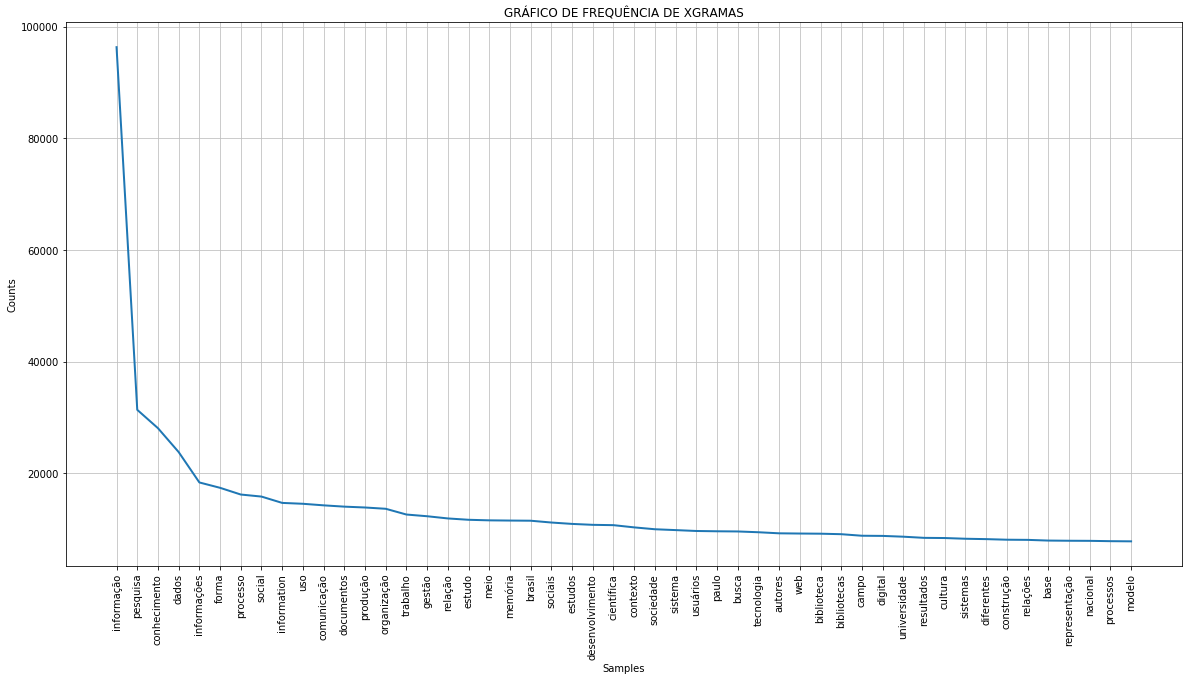

In [24]:
# MOSTRAR O GRÁFICO 

num_freq = 50
#fdist.figure(figsize=(30, 20))
arquivo_grafico = xfrequencia #mudar a variável para representações xgramas v1: total_unigramas v2: total_bigramas v3: total_trigramas v4: xfrequencia
fdist = FreqDist(arquivo_grafico)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) 
fdist.plot(num_freq,cumulative=False,title='GRÁFICO DE FREQUÊNCIA DE XGRAMAS')

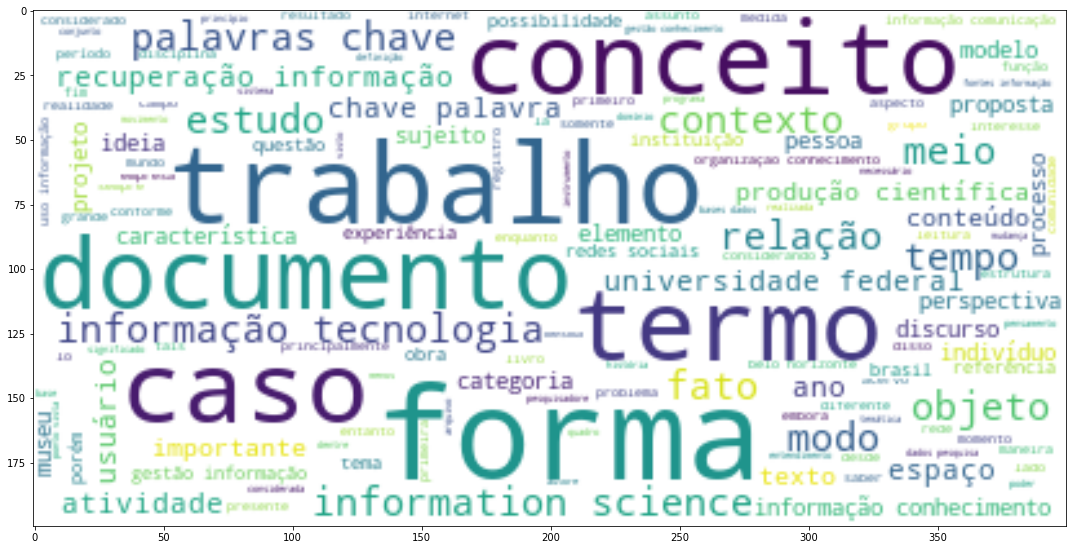

In [16]:
#NUVEM DE PALAVRAS

from wordcloud import WordCloud
cleaned =  ' '.join(xfrequencia)
num_freq = 250
wordcloud = WordCloud(max_font_size=50, max_words=num_freq, background_color="white").generate(cleaned)
fig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(wordcloud, interpolation='nearest')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout()
plt.savefig("nuvem_artigosresumos.png", format = "png")

# CRIANDO O DICIONÁRIO E O CORPUS

In [11]:
#CRIAR DICIONÁRIO 
dictionary = corpora.Dictionary(tokenized_data)
 
#TRANSFORMAR A COLEÇÃO TEXTO COM ID
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

## Latent Dirichlet Allocation (LDA)

### Modelo LDA - 10 tópicos

In [18]:
print("=========================================== Modelo LDA: 10 TÓPICOS ==================================================\n")
num_topics = 10

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 10 TÓPICOS ==================================================

Wall time: 38min 45s
Tópico 0:  0.006*"informação" + 0.002*"pesquisa" + 0.002*"conhecimento" + 0.001*"dados" + 0.001*"information" + 0.001*"informações" + 0.001*"gestão" + 0.001*"forma" + 0.001*"processo" + 0.001*"social"
Tópico 1:  0.006*"informação" + 0.002*"pesquisa" + 0.002*"conhecimento" + 0.001*"dados" + 0.001*"information" + 0.001*"informações" + 0.001*"gestão" + 0.001*"forma" + 0.001*"processo" + 0.001*"comunicação"
Tópico 2:  0.006*"informação" + 0.002*"pesquisa" + 0.002*"conhecimento" + 0.001*"dados" + 0.001*"informações" + 0.001*"information" + 0.001*"gestão" + 0.001*"forma" + 0.001*"uso" + 0.001*"processo"
Tópico 3:  0.007*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"informações" + 0.001*"information" + 0.001*"social" + 0.001*"comunicação" + 0.001*"gestão" + 0.001*"uso"
Tópico 4:  0.011*"informação" + 0.002*"pesquisa" + 0.

### Modelo LDA - 14 tópicos

In [19]:
print("=========================================== Modelo LDA: 14 TÓPICOS ==================================================\n")
num_topics = 14
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 14 TÓPICOS ==================================================

Wall time: 49min 49s
Tópico 0:  0.007*"informação" + 0.002*"pesquisa" + 0.002*"conhecimento" + 0.001*"dados" + 0.001*"informações" + 0.001*"information" + 0.001*"organização" + 0.001*"forma" + 0.001*"processo" + 0.001*"uso"
Tópico 1:  0.006*"informação" + 0.002*"pesquisa" + 0.002*"conhecimento" + 0.001*"dados" + 0.001*"information" + 0.001*"informações" + 0.001*"forma" + 0.001*"uso" + 0.001*"processo" + 0.001*"organização"
Tópico 2:  0.011*"informação" + 0.003*"pesquisa" + 0.003*"conhecimento" + 0.002*"gestão" + 0.002*"information" + 0.001*"pesquisas" + 0.001*"gestão_informação" + 0.001*"linha" + 0.001*"dados" + 0.001*"organização"
Tópico 3:  0.009*"informação" + 0.002*"information" + 0.002*"profissionais" + 0.002*"pesquisa" + 0.002*"conhecimento" + 0.002*"bibliotecário" + 0.002*"prontuário" + 0.002*"informações" + 0.002*"dados" + 0.001*"informacionais"
Tópico 4:  0.00

### Modelo LDA - 18 tópicos

In [20]:
print("=========================================== Modelo LDA: 18 TÓPICOS ==================================================\n")
num_topics = 18
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 18 TÓPICOS ==================================================

Wall time: 1h 1min 16s
Tópico 0:  0.006*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"documentos" + 0.001*"informações" + 0.001*"gestão" + 0.001*"information" + 0.001*"processo" + 0.001*"forma"
Tópico 1:  0.006*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"informações" + 0.001*"information" + 0.001*"forma" + 0.001*"processo" + 0.001*"uso" + 0.001*"social"
Tópico 2:  0.006*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"information" + 0.001*"informações" + 0.001*"produção" + 0.001*"forma" + 0.001*"uso" + 0.001*"comunicação"
Tópico 3:  0.007*"informação" + 0.002*"information" + 0.002*"evidências" + 0.002*"profissionais" + 0.002*"conhecimento" + 0.002*"pesquisa" + 0.002*"informacionais" + 0.002*"informações" + 0.001*"dados" + 0.001*"necessidades"
Tópico 4:  0.005*"informaçã

### Modelo LDA - 22 tópicos

In [21]:
print("=========================================== Modelo LDA: 22 TÓPICOS ==================================================\n")
num_topics = 22
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 22 TÓPICOS ==================================================

Wall time: 3h 23min 40s
Tópico 0:  0.007*"informação" + 0.002*"conhecimento" + 0.002*"pesquisa" + 0.001*"dados" + 0.001*"informações" + 0.001*"information" + 0.001*"gestão" + 0.001*"organização" + 0.001*"processo" + 0.001*"forma"
Tópico 1:  0.010*"informação" + 0.003*"pesquisa" + 0.002*"conhecimento" + 0.002*"linha" + 0.002*"programas" + 0.001*"dados" + 0.001*"gestão" + 0.001*"temática" + 0.001*"organização" + 0.001*"tecnologia"
Tópico 2:  0.006*"informação" + 0.002*"conhecimento" + 0.002*"pesquisa" + 0.001*"dados" + 0.001*"organização" + 0.001*"informações" + 0.001*"processo" + 0.001*"information" + 0.001*"forma" + 0.001*"documentos"
Tópico 3:  0.006*"informação" + 0.002*"pesquisa" + 0.002*"conhecimento" + 0.001*"dados" + 0.001*"informações" + 0.001*"information" + 0.001*"organização" + 0.001*"forma" + 0.001*"gestão" + 0.001*"processo"
Tópico 4:  0.006*"informação" + 

### Modelo LDA - 26 tópicos

In [22]:
print("=========================================== Modelo LDA: 26 TÓPICOS ==================================================\n")
num_topics = 26
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 26 TÓPICOS ==================================================

Wall time: 1h 27min 35s
Tópico 0:  0.007*"informação" + 0.002*"pesquisa" + 0.002*"conhecimento" + 0.001*"dados" + 0.001*"information" + 0.001*"informações" + 0.001*"forma" + 0.001*"uso" + 0.001*"processo" + 0.001*"gestão"
Tópico 1:  0.007*"informação" + 0.002*"pesquisa" + 0.002*"conhecimento" + 0.001*"dados" + 0.001*"information" + 0.001*"informações" + 0.001*"forma" + 0.001*"uso" + 0.001*"social" + 0.001*"processo"
Tópico 2:  0.011*"informação" + 0.003*"information" + 0.003*"dados" + 0.002*"parto" + 0.002*"profissionais" + 0.002*"evidências" + 0.002*"informações" + 0.002*"fonte" + 0.002*"conhecimento" + 0.002*"pesquisa"
Tópico 3:  0.007*"informação" + 0.002*"pesquisa" + 0.002*"conhecimento" + 0.001*"dados" + 0.001*"information" + 0.001*"informações" + 0.001*"forma" + 0.001*"uso" + 0.001*"gestão" + 0.001*"processo"
Tópico 4:  0.006*"informação" + 0.002*"pesquisa" + 0.0

### Modelo LDA - 30 tópicos

In [23]:
print("=========================================== Modelo LDA: 30 TÓPICOS ==================================================\n")
num_topics = 30

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 30 TÓPICOS ==================================================

Wall time: 1h 41min 31s
Tópico 0:  0.006*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"informações" + 0.001*"information" + 0.001*"forma" + 0.001*"processo" + 0.001*"uso" + 0.001*"social"
Tópico 1:  0.011*"informação" + 0.004*"parto" + 0.003*"dados" + 0.003*"fonte" + 0.002*"information" + 0.002*"digital" + 0.002*"fontes" + 0.002*"informações" + 0.002*"estudo" + 0.002*"fontes_informação"
Tópico 2:  0.007*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"information" + 0.001*"informações" + 0.001*"comunicação" + 0.001*"forma" + 0.001*"social" + 0.001*"uso"
Tópico 3:  0.006*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"informações" + 0.001*"information" + 0.001*"forma" + 0.001*"uso" + 0.001*"trabalho" + 0.001*"estudo"
Tópico 4:  0.006*"informação" + 0.002*"pesquisa" + 0.001*"

### Modelo LDA - 34 tópicos

In [24]:
print("=========================================== Modelo LDA: 34 TÓPICOS ==================================================\n")
num_topics = 34

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 34 TÓPICOS ==================================================

Wall time: 1h 52min 45s
Tópico 0:  0.012*"informação" + 0.005*"gestão" + 0.003*"gestão_informação" + 0.003*"conhecimento" + 0.002*"pesquisa" + 0.002*"information" + 0.002*"pesquisas" + 0.002*"organizações" + 0.001*"sociedade" + 0.001*"documentos"
Tópico 1:  0.012*"informação" + 0.004*"linha" + 0.004*"pesquisa" + 0.003*"conhecimento" + 0.002*"programas" + 0.002*"temática" + 0.002*"disciplinas" + 0.002*"tecnologia" + 0.002*"federal" + 0.002*"organização"
Tópico 2:  0.006*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"informações" + 0.001*"information" + 0.001*"forma" + 0.001*"processo" + 0.001*"uso" + 0.001*"estudo"
Tópico 3:  0.005*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"informações" + 0.001*"information" + 0.001*"forma" + 0.001*"documentos" + 0.001*"social" + 0.001*"processo"
Tópico 4:  0.006*"inf

### Modelo LDA - 38 tópicos

In [32]:
print("=========================================== Modelo LDA: 38 TÓPICOS ==================================================\n")
num_topics = 38

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 38 TÓPICOS ==================================================

Wall time: 2h 5min 20s
Tópico 0:  0.006*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"informações" + 0.001*"information" + 0.001*"forma" + 0.001*"processo" + 0.001*"uso" + 0.001*"trabalho"
Tópico 1:  0.006*"informação" + 0.002*"pesquisa" + 0.002*"conhecimento" + 0.001*"dados" + 0.001*"informações" + 0.001*"information" + 0.001*"forma" + 0.001*"uso" + 0.001*"processo" + 0.001*"estudo"
Tópico 2:  0.013*"informação" + 0.005*"linha" + 0.004*"pesquisa" + 0.003*"programas" + 0.003*"conhecimento" + 0.003*"temática" + 0.002*"tecnologia" + 0.002*"gestão" + 0.002*"disciplinas" + 0.002*"federal"
Tópico 3:  0.010*"informação" + 0.006*"prontuário" + 0.003*"competência" + 0.003*"eletrônico" + 0.003*"prontuário_eletrônico" + 0.003*"competência_informação" + 0.003*"paciente" + 0.002*"pesquisa" + 0.002*"information" + 0.002*"profissionais"
Tópico 4:  0

### Modelo LDA - 42 tópicos

In [33]:
print("=========================================== Modelo LDA: 42 TÓPICOS ==================================================\n")
num_topics = 42

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))




=========================================== Modelo LDA: 42 TÓPICOS ==================================================

Wall time: 2h 17min 30s
Tópico 0:  0.005*"informação" + 0.002*"pesquisa" + 0.002*"conhecimento" + 0.001*"dados" + 0.001*"forma" + 0.001*"social" + 0.001*"processo" + 0.001*"informações" + 0.001*"produção" + 0.001*"comunicação"
Tópico 1:  0.005*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"informações" + 0.001*"produção" + 0.001*"forma" + 0.001*"information" + 0.001*"científica" + 0.001*"autores"
Tópico 2:  0.006*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"informações" + 0.001*"forma" + 0.001*"information" + 0.001*"social" + 0.001*"processo" + 0.001*"comunicação"
Tópico 3:  0.005*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"informações" + 0.001*"forma" + 0.001*"produção" + 0.001*"social" + 0.001*"processo" + 0.001*"information"
Tópico 4:  0.006*"informação" + 0.002*"

Tópico 40:  0.005*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"informações" + 0.001*"documentos" + 0.001*"dados" + 0.001*"processo" + 0.001*"bibliográfica_natureza_qualitativa" + 0.001*"forma" + 0.001*"produção"
Tópico 41:  0.006*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"informações" + 0.001*"information" + 0.001*"forma" + 0.001*"social" + 0.001*"processo" + 0.001*"comunicação"


## Imprimir o melhor resultado - LDA

In [12]:
#IMPRESSÃO DO MELHOR RESULTADO
print("=========================================== Modelo LDA: 6 TÓPICOS ==================================================\n")
num_topics = 6

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 6 TÓPICOS ==================================================

Wall time: 32min 23s
Tópico 0:  0.006*"informação" + 0.002*"pesquisa" + 0.002*"dados" + 0.001*"conhecimento" + 0.001*"informações" + 0.001*"information" + 0.001*"uso" + 0.001*"forma" + 0.001*"gestão" + 0.001*"processo"
Tópico 1:  0.008*"informação" + 0.003*"pesquisa" + 0.002*"dados" + 0.002*"conhecimento" + 0.001*"information" + 0.001*"gestão" + 0.001*"produção" + 0.001*"informações" + 0.001*"comunicação" + 0.001*"científica"
Tópico 2:  0.006*"informação" + 0.002*"pesquisa" + 0.002*"conhecimento" + 0.001*"dados" + 0.001*"informações" + 0.001*"information" + 0.001*"processo" + 0.001*"forma" + 0.001*"social" + 0.001*"uso"
Tópico 3:  0.010*"informação" + 0.002*"information" + 0.002*"pesquisa" + 0.002*"conhecimento" + 0.002*"dados" + 0.002*"profissionais" + 0.001*"gestão" + 0.001*"informações" + 0.001*"bibliotecário" + 0.001*"contexto"
Tópico 4:  0.005*"informação" + 0.002*

### PyLDAvis

Criando a visulização dos tópicos do modelo LDA.

In [13]:
#IMPORTAR BIBLIOTECA PARA VISUALIZAÇÃO DOS TÓPICOS LDA
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#VISUALIZAR NO GRÁFICO PYLDAVIS
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.save_html( 'artigosresumos_lda.html')
vis

## Latent Semantic Indexing (LSI)


### Modelo LSI - 10 tópicos

In [22]:
print("=========================================== Modelo LSI: 10 TÓPICOS ==================================================\n")

NUM_TOPICS = 10
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 10 TÓPICOS ==================================================

Wall time: 2min 51s
Tópico #0:  0.608*"informação" + 0.231*"dados" + 0.179*"pesquisa" + 0.143*"web" + 0.131*"conhecimento" + 0.119*"informações" + 0.112*"uso" + 0.108*"forma" + 0.104*"information" + 0.100*"usuários"
Tópico #1:  -0.463*"informação" + 0.408*"dados" + 0.271*"web" + -0.180*"conhecimento" + 0.163*"metadados" + 0.161*"data" + 0.105*"usuários" + 0.104*"sistemas" + 0.102*"digitais" + -0.100*"social"
Tópico #2:  -0.517*"informação" + 0.212*"memória" + 0.170*"documentos" + 0.164*"pesquisa" + 0.161*"museu" + 0.145*"conhecimento" + 0.134*"cultural" + 0.132*"museus" + 0.130*"patrimônio" + 0.122*"produção"
Tópico #3:  -0.691*"conhecimento" + -0.215*"organização" + -0.194*"gestão" + 0.183*"memória" + 0.135*"informação" + 0.117*"biblioteca" + -0.113*"knowledge" + 0.099*"cultural" + 0.099*"museu" + -0.099*"organizacional"
Tópico #4:  -0.282*"pesquisa" + -0.279*"dados" 

### Modelo LSI - 14 tópicos

In [23]:
print("=========================================== Modelo LSI: 14 TÓPICOS ==================================================\n")

NUM_TOPICS = 14
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 14 TÓPICOS ==================================================

Wall time: 3min 6s
Tópico #0:  0.608*"informação" + 0.231*"dados" + 0.179*"pesquisa" + 0.143*"web" + 0.131*"conhecimento" + 0.119*"informações" + 0.112*"uso" + 0.108*"forma" + 0.104*"information" + 0.100*"usuários"
Tópico #1:  0.463*"informação" + -0.408*"dados" + -0.271*"web" + 0.180*"conhecimento" + -0.163*"metadados" + -0.161*"data" + -0.105*"usuários" + -0.104*"sistemas" + -0.102*"digitais" + 0.100*"social"
Tópico #2:  0.517*"informação" + -0.212*"memória" + -0.170*"documentos" + -0.164*"pesquisa" + -0.161*"museu" + -0.145*"conhecimento" + -0.134*"cultural" + -0.132*"museus" + -0.130*"patrimônio" + -0.122*"produção"
Tópico #3:  0.691*"conhecimento" + 0.215*"organização" + 0.194*"gestão" + -0.183*"memória" + -0.135*"informação" + -0.117*"biblioteca" + 0.113*"knowledge" + -0.099*"cultural" + -0.099*"museu" + 0.099*"organizacional"
Tópico #4:  0.282*"pesquisa" + 0.279

### Modelo LSI - 18 tópicos

In [24]:
print("=========================================== Modelo LSI: 18 TÓPICOS ==================================================\n")

NUM_TOPICS = 18
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 18 TÓPICOS ==================================================

Wall time: 3min 14s
Tópico #0:  0.608*"informação" + 0.231*"dados" + 0.179*"pesquisa" + 0.143*"web" + 0.131*"conhecimento" + 0.119*"informações" + 0.112*"uso" + 0.108*"forma" + 0.104*"information" + 0.100*"usuários"
Tópico #1:  -0.463*"informação" + 0.408*"dados" + 0.271*"web" + -0.180*"conhecimento" + 0.163*"metadados" + 0.161*"data" + 0.105*"usuários" + 0.104*"sistemas" + 0.102*"digitais" + -0.100*"social"
Tópico #2:  -0.517*"informação" + 0.212*"memória" + 0.170*"documentos" + 0.164*"pesquisa" + 0.161*"museu" + 0.145*"conhecimento" + 0.134*"cultural" + 0.132*"museus" + 0.130*"patrimônio" + 0.122*"produção"
Tópico #3:  -0.691*"conhecimento" + -0.215*"organização" + -0.194*"gestão" + 0.183*"memória" + 0.135*"informação" + 0.117*"biblioteca" + -0.113*"knowledge" + 0.100*"cultural" + 0.099*"museu" + -0.099*"organizacional"
Tópico #4:  -0.282*"pesquisa" + -0.279*"dados" 

### Modelo LSI - 22 tópicos

In [25]:
print("=========================================== Modelo LSI: 22 TÓPICOS ==================================================\n")

NUM_TOPICS = 22
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 22 TÓPICOS ==================================================

Wall time: 3min 34s
Tópico #0:  0.608*"informação" + 0.231*"dados" + 0.179*"pesquisa" + 0.143*"web" + 0.131*"conhecimento" + 0.119*"informações" + 0.112*"uso" + 0.108*"forma" + 0.104*"information" + 0.100*"usuários"
Tópico #1:  0.463*"informação" + -0.408*"dados" + -0.271*"web" + 0.180*"conhecimento" + -0.163*"metadados" + -0.161*"data" + -0.105*"usuários" + -0.104*"sistemas" + -0.102*"digitais" + 0.100*"social"
Tópico #2:  0.517*"informação" + -0.212*"memória" + -0.170*"documentos" + -0.164*"pesquisa" + -0.161*"museu" + -0.145*"conhecimento" + -0.134*"cultural" + -0.132*"museus" + -0.130*"patrimônio" + -0.122*"produção"
Tópico #3:  -0.691*"conhecimento" + -0.215*"organização" + -0.194*"gestão" + 0.183*"memória" + 0.135*"informação" + 0.117*"biblioteca" + -0.113*"knowledge" + 0.100*"cultural" + 0.099*"museu" + -0.099*"organizacional"
Tópico #4:  0.282*"pesquisa" + 0.27

### Modelo LSI - 26 tópicos

In [26]:
print("=========================================== Modelo LSI: 26 TÓPICOS ==================================================\n")

NUM_TOPICS = 26
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 26 TÓPICOS ==================================================

Wall time: 3min 52s
Tópico #0:  0.608*"informação" + 0.231*"dados" + 0.179*"pesquisa" + 0.143*"web" + 0.131*"conhecimento" + 0.119*"informações" + 0.112*"uso" + 0.108*"forma" + 0.104*"information" + 0.100*"usuários"
Tópico #1:  0.463*"informação" + -0.408*"dados" + -0.271*"web" + 0.180*"conhecimento" + -0.163*"metadados" + -0.161*"data" + -0.105*"usuários" + -0.104*"sistemas" + -0.102*"digitais" + 0.100*"social"
Tópico #2:  -0.517*"informação" + 0.212*"memória" + 0.170*"documentos" + 0.164*"pesquisa" + 0.161*"museu" + 0.145*"conhecimento" + 0.134*"cultural" + 0.132*"museus" + 0.130*"patrimônio" + 0.122*"produção"
Tópico #3:  -0.691*"conhecimento" + -0.215*"organização" + -0.194*"gestão" + 0.183*"memória" + 0.135*"informação" + 0.117*"biblioteca" + -0.113*"knowledge" + 0.099*"cultural" + 0.099*"museu" + -0.099*"organizacional"
Tópico #4:  -0.282*"pesquisa" + -0.279*"dad

### Modelo LSI - 30 tópicos

In [27]:
print("=========================================== Modelo LSI: 30 TÓPICOS ==================================================\n")

NUM_TOPICS = 30
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 30 TÓPICOS ==================================================

Wall time: 4min 7s
Tópico #0:  0.608*"informação" + 0.231*"dados" + 0.179*"pesquisa" + 0.143*"web" + 0.131*"conhecimento" + 0.119*"informações" + 0.112*"uso" + 0.108*"forma" + 0.104*"information" + 0.100*"usuários"
Tópico #1:  0.463*"informação" + -0.408*"dados" + -0.271*"web" + 0.180*"conhecimento" + -0.163*"metadados" + -0.161*"data" + -0.105*"usuários" + -0.104*"sistemas" + -0.102*"digitais" + 0.100*"social"
Tópico #2:  0.517*"informação" + -0.212*"memória" + -0.170*"documentos" + -0.164*"pesquisa" + -0.161*"museu" + -0.145*"conhecimento" + -0.134*"cultural" + -0.132*"museus" + -0.130*"patrimônio" + -0.122*"produção"
Tópico #3:  0.691*"conhecimento" + 0.215*"organização" + 0.194*"gestão" + -0.183*"memória" + -0.135*"informação" + -0.117*"biblioteca" + 0.113*"knowledge" + -0.100*"cultural" + -0.099*"museu" + 0.099*"organizacional"
Tópico #4:  -0.282*"pesquisa" + -0.2

### Modelo LSI - 34 tópicos

In [28]:
print("=========================================== Modelo LSI: 34 TÓPICOS ==================================================\n")

NUM_TOPICS = 34
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 34 TÓPICOS ==================================================

Wall time: 4min 18s
Tópico #0:  0.608*"informação" + 0.231*"dados" + 0.179*"pesquisa" + 0.143*"web" + 0.131*"conhecimento" + 0.119*"informações" + 0.112*"uso" + 0.108*"forma" + 0.104*"information" + 0.100*"usuários"
Tópico #1:  0.463*"informação" + -0.408*"dados" + -0.271*"web" + 0.180*"conhecimento" + -0.163*"metadados" + -0.161*"data" + -0.105*"usuários" + -0.104*"sistemas" + -0.102*"digitais" + 0.100*"social"
Tópico #2:  -0.517*"informação" + 0.212*"memória" + 0.170*"documentos" + 0.164*"pesquisa" + 0.161*"museu" + 0.145*"conhecimento" + 0.134*"cultural" + 0.132*"museus" + 0.130*"patrimônio" + 0.122*"produção"
Tópico #3:  -0.691*"conhecimento" + -0.215*"organização" + -0.194*"gestão" + 0.183*"memória" + 0.135*"informação" + 0.117*"biblioteca" + -0.113*"knowledge" + 0.100*"cultural" + 0.099*"museu" + -0.099*"organizacional"
Tópico #4:  0.282*"pesquisa" + 0.279*"dados

### Modelo LSI - 38 tópicos

In [29]:
print("=========================================== Modelo LSI: 38 TÓPICOS ==================================================\n")

NUM_TOPICS = 38
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 38 TÓPICOS ==================================================

Wall time: 4min 53s
Tópico #0:  0.608*"informação" + 0.231*"dados" + 0.179*"pesquisa" + 0.143*"web" + 0.131*"conhecimento" + 0.119*"informações" + 0.112*"uso" + 0.108*"forma" + 0.104*"information" + 0.100*"usuários"
Tópico #1:  0.463*"informação" + -0.408*"dados" + -0.271*"web" + 0.180*"conhecimento" + -0.163*"metadados" + -0.161*"data" + -0.105*"usuários" + -0.104*"sistemas" + -0.102*"digitais" + 0.100*"social"
Tópico #2:  -0.517*"informação" + 0.212*"memória" + 0.170*"documentos" + 0.164*"pesquisa" + 0.161*"museu" + 0.145*"conhecimento" + 0.134*"cultural" + 0.132*"museus" + 0.130*"patrimônio" + 0.122*"produção"
Tópico #3:  0.691*"conhecimento" + 0.215*"organização" + 0.194*"gestão" + -0.183*"memória" + -0.135*"informação" + -0.117*"biblioteca" + 0.113*"knowledge" + -0.100*"cultural" + -0.099*"museu" + 0.099*"organizacional"
Tópico #4:  0.282*"pesquisa" + 0.279*"dados

### Modelo LSI - 42 tópicos

In [30]:
print("=========================================== Modelo LSI: 42 TÓPICOS ==================================================\n")

NUM_TOPICS = 42
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 42 TÓPICOS ==================================================

Wall time: 5min 44s
Tópico #0:  0.608*"informação" + 0.231*"dados" + 0.179*"pesquisa" + 0.143*"web" + 0.131*"conhecimento" + 0.119*"informações" + 0.112*"uso" + 0.108*"forma" + 0.104*"information" + 0.100*"usuários"
Tópico #1:  0.463*"informação" + -0.408*"dados" + -0.271*"web" + 0.180*"conhecimento" + -0.163*"metadados" + -0.161*"data" + -0.105*"usuários" + -0.104*"sistemas" + -0.102*"digitais" + 0.100*"social"
Tópico #2:  -0.517*"informação" + 0.212*"memória" + 0.170*"documentos" + 0.164*"pesquisa" + 0.161*"museu" + 0.145*"conhecimento" + 0.134*"cultural" + 0.132*"museus" + 0.130*"patrimônio" + 0.122*"produção"
Tópico #3:  0.691*"conhecimento" + 0.215*"organização" + 0.194*"gestão" + -0.183*"memória" + -0.135*"informação" + -0.117*"biblioteca" + 0.113*"knowledge" + -0.099*"cultural" + -0.099*"museu" + 0.099*"organizacional"
Tópico #4:  -0.282*"pesquisa" + -0.279*"dad

Tópico #40:  -0.363*"comunicação" + -0.209*"autores" + 0.174*"periódicos" + 0.173*"cultura" + -0.163*"patrimônio" + -0.136*"trabalho" + -0.132*"trabalhos" + 0.130*"objetos" + -0.126*"uso" + 0.125*"artigos"
Tópico #41:  0.218*"artigos" + -0.199*"classificação" + 0.174*"documento" + -0.170*"avaliação" + 0.152*"documentos" + -0.142*"qualidade" + -0.140*"metadados" + -0.133*"competência" + -0.133*"comunicação" + -0.130*"imagens"


## Imprimir o melhor resultado - LSI

In [31]:
#MELHOR LSI
print("=========================================== Modelo LSI: 30 TÓPICOS ==================================================\n")

NUM_TOPICS = 30
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 30 TÓPICOS ==================================================

Wall time: 4min
Tópico #0:  0.608*"informação" + 0.231*"dados" + 0.179*"pesquisa" + 0.143*"web" + 0.131*"conhecimento" + 0.119*"informações" + 0.112*"uso" + 0.108*"forma" + 0.104*"information" + 0.100*"usuários"
Tópico #1:  0.463*"informação" + -0.408*"dados" + -0.271*"web" + 0.180*"conhecimento" + -0.163*"metadados" + -0.161*"data" + -0.105*"usuários" + -0.104*"sistemas" + -0.102*"digitais" + 0.100*"social"
Tópico #2:  -0.517*"informação" + 0.212*"memória" + 0.170*"documentos" + 0.164*"pesquisa" + 0.161*"museu" + 0.145*"conhecimento" + 0.134*"cultural" + 0.132*"museus" + 0.130*"patrimônio" + 0.122*"produção"
Tópico #3:  -0.691*"conhecimento" + -0.215*"organização" + -0.194*"gestão" + 0.183*"memória" + 0.135*"informação" + 0.117*"biblioteca" + -0.113*"knowledge" + 0.099*"cultural" + 0.099*"museu" + -0.099*"organizacional"
Tópico #4:  -0.282*"pesquisa" + -0.279*"dados" 